(c) 2016 - present. Enplus Advisors, Inc.

# Programming with Data:<br>Advanced Python and Pandas<br><br>Time Series

In [1]:
import pandas as pd
import numpy as np

np.random.seed(252)

def random_series(dts):
    res = pd.Series(np.random.randn(len(dts)), index=dts)
    return res

def image(name, **kwargs):
    from IPython.display import Image
    return Image(filename=f'assets/{name}', retina=True, **kwargs)

## Time Series

No new classes for Series and DataFrame. 

A "timeseries" is a `Series` or `DataFrame` with a time index of some type.

### Create a simple time series

* Standard datetime import
* Create a scalar time series
* Show the new type of index - note no `freq`

In [2]:
ts = pd.Timestamp('2000-01-01 00:00')

In [3]:
s1 = pd.Series(101.7, index=[ts])
s1

2000-01-01    101.7
dtype: float64

In [4]:
s1.index

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq=None)

## Time Series Utility Functions

In [5]:
# Create a year's worth of business dates
dts = pd.date_range('2000-01-01', '2001-12-31', freq='B')
ts = pd.Series(np.random.randn(len(dts)), index=dts)
ts.head()

2000-01-03   -0.011498
2000-01-04   -0.085123
2000-01-05    0.075910
2000-01-06   -1.649279
2000-01-07   -0.751812
Freq: B, dtype: float64

## Selecting from a Time Series

Notice how the slicing selects across non-contiguous dates.

In [6]:
ts['2000-03-20'] # ts.loc['2000-03-20']

1.3091432326146675

In [7]:
ts['2000-03-24':'2000-03-30']

2000-03-24    0.360544
2000-03-27   -0.820640
2000-03-28    0.106317
2000-03-29    1.364270
2000-03-30   -0.490908
Freq: B, dtype: float64

### Select by month

In [8]:
ts['2000-02'].head()

2000-02-01    1.157154
2000-02-02    2.183902
2000-02-03   -0.286083
2000-02-04    1.283730
2000-02-07    0.570529
Freq: B, dtype: float64

### Select by year

In [9]:
ts['2000'].head()

2000-01-03   -0.011498
2000-01-04   -0.085123
2000-01-05    0.075910
2000-01-06   -1.649279
2000-01-07   -0.751812
Freq: B, dtype: float64

## Leading and Lagging

* Common time series operation
* Useful for calculating things differences, percent change over time

### Lagging

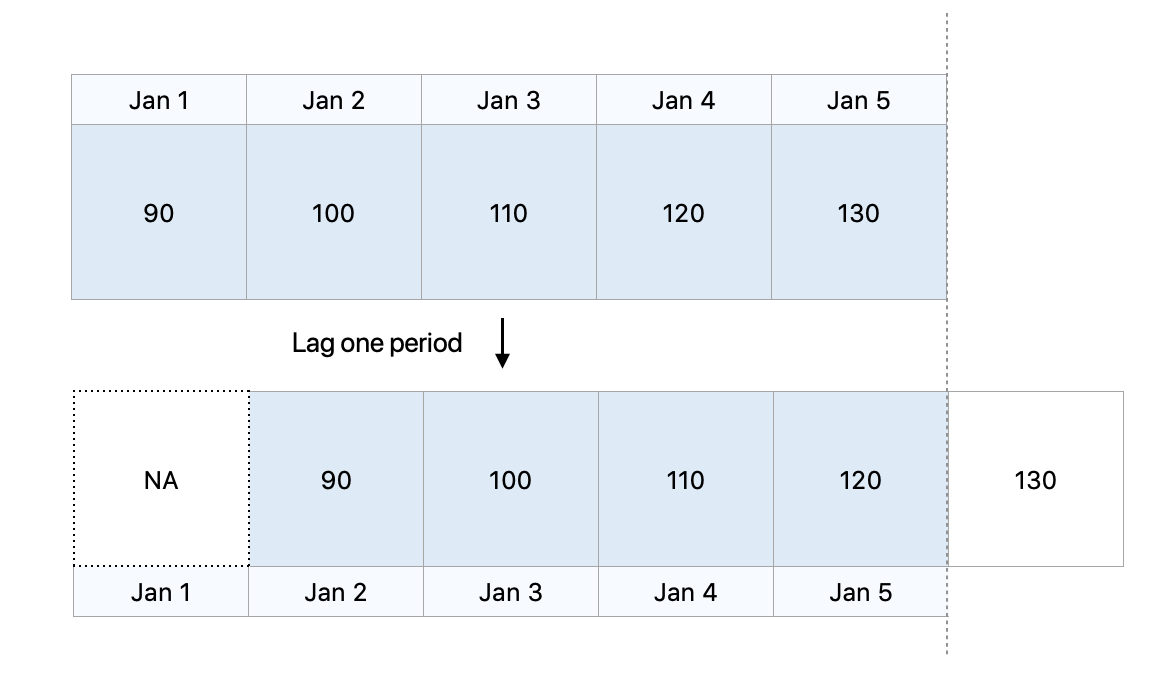

In [10]:
image('lag.png')

#### Lagging using position

In [11]:
ts2k = ts['2000-01'].copy()
ts2k.shift(1).iloc[[0, 1, 2, -2, -1]] # show first and last few rows

2000-01-03         NaN
2000-01-04   -0.011498
2000-01-05   -0.085123
2000-01-28   -1.724383
2000-01-31   -0.858197
dtype: float64

Notice that the `index` is constant. We drop the first value.

#### Lagging using index

The values remain constant but the index shifts

In [12]:
ts2k.tshift(1).iloc[[0, 1, 2, -2, -1]]

2000-01-04   -0.011498
2000-01-05   -0.085123
2000-01-06    0.075910
2000-01-31   -0.858197
2000-02-01    1.681411
dtype: float64

`pandas` understands the type of index so the last element
in the `Series` is updated to the next month!

### Leading data

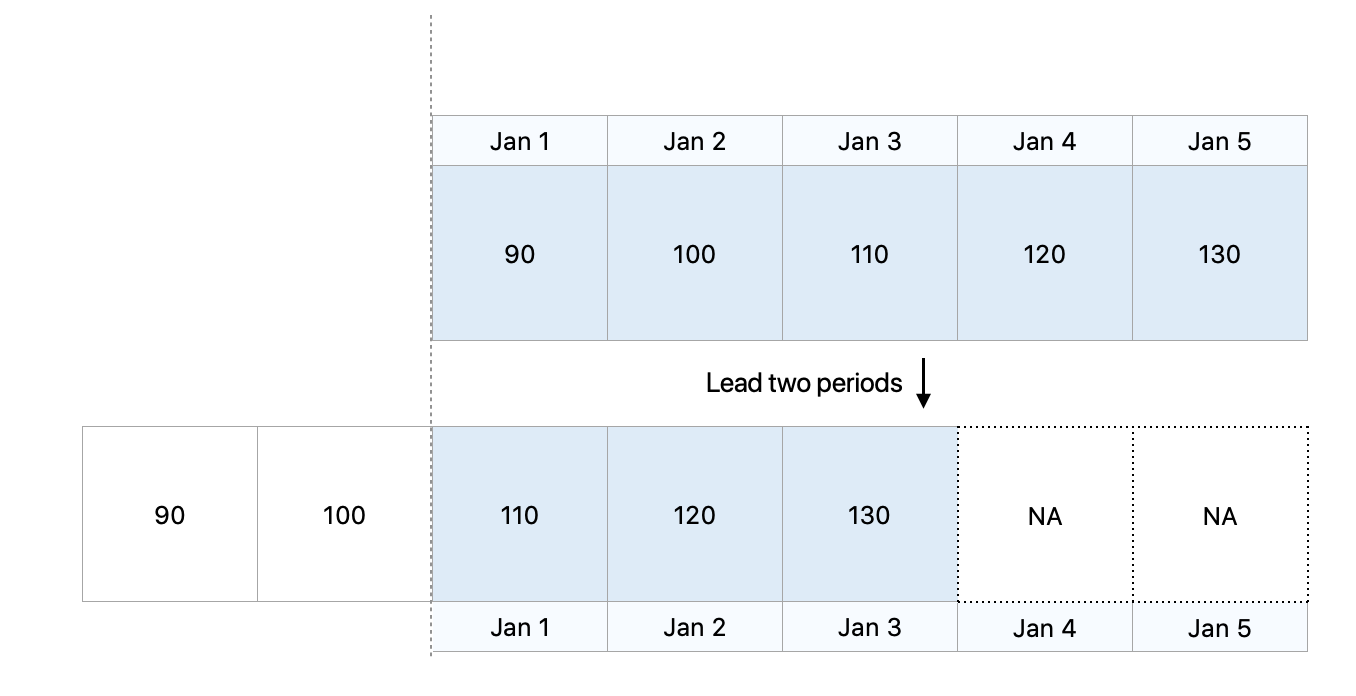

In [13]:
image('lead.png')

TODO: Add example here of lead/lag to calculate a percentage difference

## Changing Frequencies: Resampling

Resampling is similar to grouping, expect with time and notions of
forwards and backwards.

In [14]:
dts1 = pd.date_range('2000-01-01', '2000-03-31', freq='D')
ts3 = pd.Series(np.random.randn(len(dts1)), index=dts1)

In [15]:
grp = ts3.resample('M')

### Resampling is like grouping

In [16]:
grp.mean()

2000-01-31   -0.210334
2000-02-29   -0.019870
2000-03-31    0.213579
Freq: M, dtype: float64

In [17]:
grp.agg(['mean', 'std'])

,mean,std
2000-01-31,-0.210334,0.894538
2000-02-29,-0.019870,1.051419
2000-03-31,0.213579,0.970263


## Filling Missing Data 

In [18]:
def make_series_4():
    dts = pd.date_range('2000-01-02', '2000-01-07', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv.iloc[[0, 2, 5]] = np.nan
    return rv

ts4 = make_series_4()
ts4

2000-01-02         NaN
2000-01-03    1.301518
2000-01-04         NaN
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07         NaN
Freq: D, dtype: float64

### Filling Data Forward

In [19]:
ts4.ffill()

2000-01-02         NaN
2000-01-03    1.301518
2000-01-04    1.301518
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07    1.001597
Freq: D, dtype: float64

### Filling Data Backwards

In [20]:
ts4.bfill()

2000-01-02    1.301518
2000-01-03    1.301518
2000-01-04   -1.452010
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07         NaN
Freq: D, dtype: float64

### Filling with limits

In [21]:
def make_series_5():
    dts = pd.date_range('2000-01-01', '2000-01-05', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv[1:] = np.nan
    return rv

ts5 = make_series_5()
ts5

2000-01-01    1.33151
2000-01-02        NaN
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
Freq: D, dtype: float64

### Filling with limits (cont)

In [22]:
ts5.ffill(limit=2)

2000-01-01    1.33151
2000-01-02    1.33151
2000-01-03    1.33151
2000-01-04        NaN
2000-01-05        NaN
Freq: D, dtype: float64

## Aligning Dates

### Sample Data

Create a weekly and monthly series.

In [23]:
dts_m = pd.bdate_range('2000-01', periods=2, freq='MS')
t_bill = pd.Series([0.012, 0.023], index=dts_m)

dts_d = pd.bdate_range('2000-01-01', periods=8, freq='W')
sp5_weekly = random_series(dts_d)

### View the data

In [24]:
sp5_weekly

2000-01-02   -1.352033
2000-01-09   -0.185830
2000-01-16   -1.156032
2000-01-23   -0.608064
2000-01-30   -1.120766
2000-02-06   -2.069586
2000-02-13   -0.499210
2000-02-20   -0.201274
Freq: W-SUN, dtype: float64

In [25]:
t_bill

2000-01-01    0.012
2000-02-01    0.023
Freq: MS, dtype: float64

### Using `reindex`

In [26]:
t_bill.reindex(sp5_weekly.index)

2000-01-02   NaN
2000-01-09   NaN
2000-01-16   NaN
2000-01-23   NaN
2000-01-30   NaN
2000-02-06   NaN
2000-02-13   NaN
2000-02-20   NaN
Freq: W-SUN, dtype: float64

### Reindex and fill forward

In [27]:
t_bill.reindex(sp5_weekly.index, method='ffill')

2000-01-02    0.012
2000-01-09    0.012
2000-01-16    0.012
2000-01-23    0.012
2000-01-30    0.012
2000-02-06    0.023
2000-02-13    0.023
2000-02-20    0.023
Freq: W-SUN, dtype: float64

## Rolling Calculations

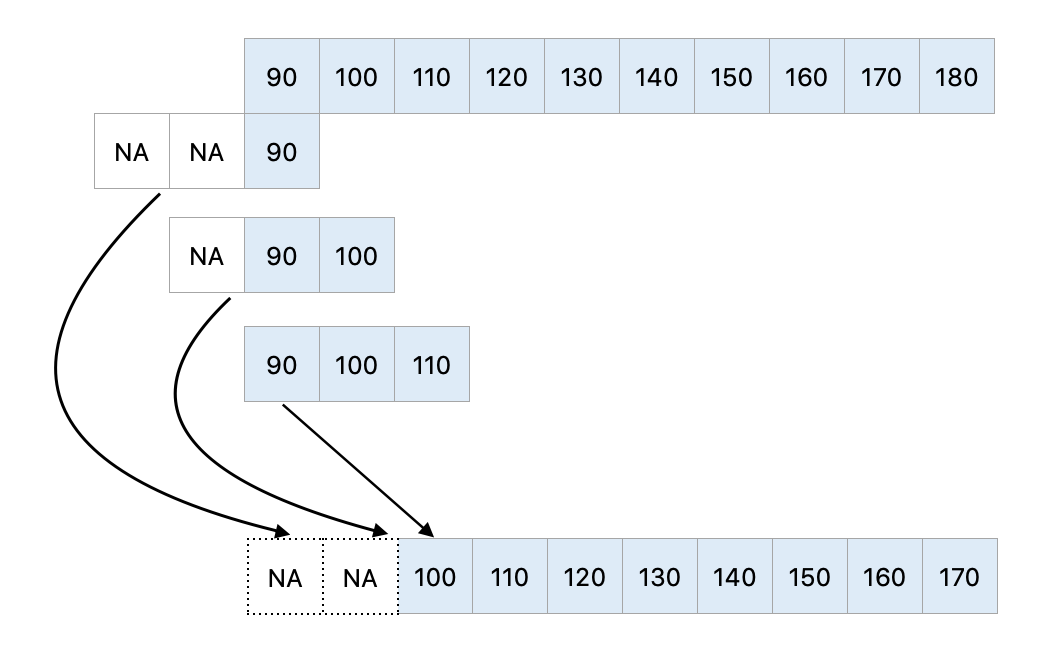

In [28]:
image('rolling.png')

### Rolling example

In [29]:
roll = sp5_weekly.rolling(2)

In [30]:
roll.mean()

2000-01-02         NaN
2000-01-09   -0.768931
2000-01-16   -0.670931
2000-01-23   -0.882048
2000-01-30   -0.864415
2000-02-06   -1.595176
2000-02-13   -1.284398
2000-02-20   -0.350242
Freq: W-SUN, dtype: float64